In [ ]:
# ysa_mnist.ipynb
from keras.datasets import mnist

(train_images,train_labels),(test_images,test_labels)=mnist.load_data()

In [ ]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

In [ ]:
import numpy as np
sayi=100
np.set_printoptions(linewidth=300)
print(train_images[sayi])
import matplotlib.pyplot as plt

plt.imshow(train_images[sayi],cmap="gray")
plt.show()
print(train_labels[sayi])



In [ ]:
# veriler(resimler) normalize edilecek.
# Etiketlerin tek sütun yapısı tek-satırı-tek(one-hot-encoding) kodlama ile tahmin edilecek sınıf sayısına çıkarılacak

train_images = train_images.astype("float32")/255
test_images=test_images.astype("float32")/255


In [ ]:
print(train_images[sayi])

In [ ]:
from keras.utils import to_categorical

print(train_labels[0:5])
print(test_labels[0:5])

train_labels=to_categorical(train_labels)
test_labels=to_categorical(test_labels)
print(train_labels[0:5])
print(test_labels[0:5])

In [25]:
from keras.models import Sequential
from keras.layers import Dense,Flatten
from keras.callbacks import ModelCheckpoint


 #### 6-layer 784-2500-2000-1500-1000-500-10

In [27]:

model=Sequential()
model.add(Flatten(input_shape=(28,28)))# 2B resimleri alıp 1B ye çevirir
model.add(Dense(2500,activation="relu"))
model.add(Dense(2000,activation="relu"))
model.add(Dense(1500,activation="relu"))
model.add(Dense(1000,activation="relu"))
model.add(Dense(500,activation="relu"))
model.add(Dense(10,activation="softmax"))

model.compile(loss="categorical_crossentropy",optimizer="rmsprop",metrics=["accuracy"])
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_24 (Dense)            (None, 2500)              1962500   
                                                                 
 dense_25 (Dense)            (None, 2000)              5002000   
                                                                 
 dense_26 (Dense)            (None, 1500)              3001500   
                                                                 
 dense_27 (Dense)            (None, 1000)              1501000   
                                                                 
 dense_28 (Dense)            (None, 500)               500500    
                                                                 
 dense_29 (Dense)            (None, 10)               

In [28]:
cp=ModelCheckpoint("duz_minst.h5",monitor="accuracy",mode="max",save_best_only=True)

In [29]:
history = model.fit(train_images,train_labels,validation_split=0.2,epochs=5,callbacks=[cp])

Epoch 1/5
1500/1500 [==============================] - 117s 78ms/step - loss: 0.3391 - accuracy: 0.9096 - val_loss: 0.1491 - val_accuracy: 0.9601
Epoch 2/5
   1/1500 [..............................] - ETA: 1:54 - loss: 0.2924 - accuracy: 0.9375

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1500/1500 [==============================] - 116s 78ms/step - loss: 0.1517 - accuracy: 0.9647 - val_loss: 0.1403 - val_accuracy: 0.9674
Epoch 3/5
1500/1500 [==============================] - 118s 79ms/step - loss: 0.1188 - accuracy: 0.9744 - val_loss: 0.1438 - val_accuracy: 0.9696
Epoch 4/5
1500/1500 [==============================] - 116s 77ms/step - loss: 0.0956 - accuracy: 0.9805 - val_loss: 0.1573 - val_accuracy: 0.9707
Epoch 5/5
1500/1500 [==============================] - 116s 78ms/step - loss: 0.0804 - accuracy: 0.9830 - val_loss: 0.1396 - val_accuracy: 0.9778


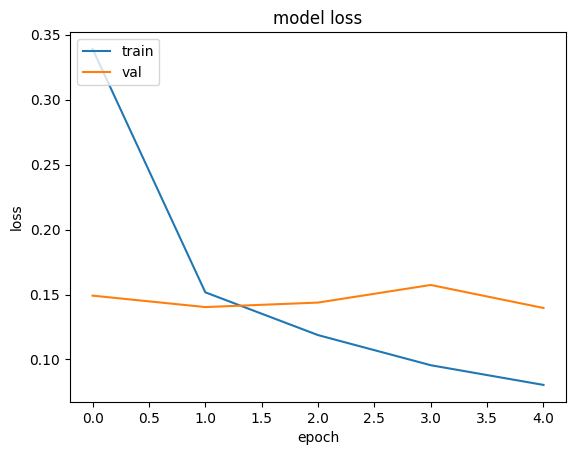

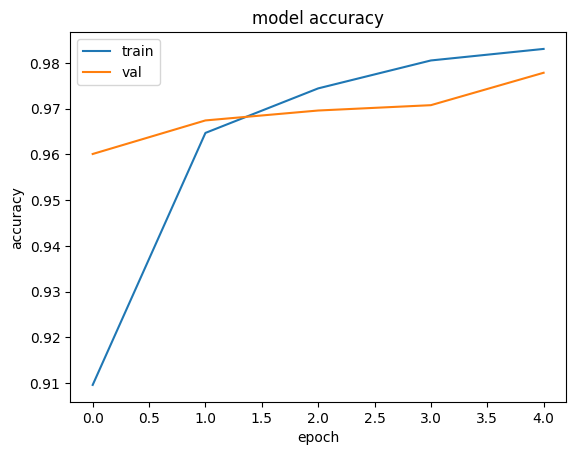

In [31]:
import matplotlib.pyplot as plt

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train","val"],loc="upper left")
plt.show()

plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train","val"],loc="upper left")
plt.show()

In [32]:
skor = model.evaluate(test_images,test_labels)
print(skor)

313/313 [==============================] - 2s 6ms/step - loss: 0.1414 - accuracy: 0.9773
[0.14143821597099304, 0.9772999882698059]


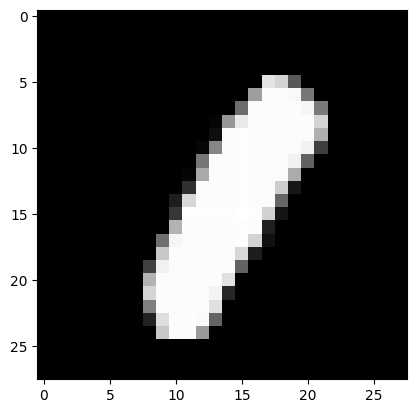

1/1 [==============================] - 0s 15ms/step
tahmin rakamı: 8 olması gereken: 1
0 ihtimali: 0.0009831984
1 ihtimali: 0.00021567436
2 ihtimali: 0.002192966
3 ihtimali: 0.004285429
4 ihtimali: 7.15072e-05
5 ihtimali: 0.0003230963
6 ihtimali: 3.5225403e-05
7 ihtimali: 0.00011943383
8 ihtimali: 0.9912742
9 ihtimali: 0.00049940194


In [60]:
rastgele_rakam =7899
plt.imshow(test_images[rastgele_rakam],cmap="gray")
plt.show()
tahmin=model.predict(test_images[rastgele_rakam].reshape(1,28,28))
print("tahmin rakamı:",np.argmax(tahmin),"olması gereken:",np.argmax(test_labels[rastgele_rakam]))
for i in range(10):
    print(i,"ihtimali:",tahmin[0,i])